In [102]:
import matplotlib.pyplot as plt

from gem.utils import graph_util, plot_util
from gem.evaluation import visualize_embedding as viz
from gem.evaluation import evaluate_graph_reconstruction as gr
from time import time

from gem.embedding.gf       import GraphFactorization
from gem.embedding.hope     import HOPE
from gem.embedding.lap      import LaplacianEigenmaps
from gem.embedding.lle      import LocallyLinearEmbedding
from gem.embedding.node2vec import node2vec
from gem.embedding.sdne     import SDNE

# File that contains the edges. Format: source target
# Optionally, you can add weights as third column: source target weight
edge_f = 'C:/Users/Hp/Downloads/GEM/examples/data/karate.edgelist'
# Specify whether the edges are directed
isDirected = True

# Load graph
G = graph_util.loadGraphFromEdgeListTxt(edge_f, directed=isDirected)
G = G.to_directed()

# List of edges 

In [103]:

with open(edge_f, 'r') as f:
    print(f.read())

0 31
0 21
0 19
0 17
0 13
0 12
0 11
0 10
0 8
0 7
0 6
0 5
0 4
0 3
0 2
0 1
1 30
1 21
1 19
1 17
1 13
1 7
1 3
1 2
2 13
2 8
2 9
2 32
2 28
2 27
2 7
2 3
3 13
3 12
3 7
4 10
4 6
5 16
5 10
5 6
6 16
8 33
8 32
8 32
9 33
13 33
14 33
14 32
15 33
15 32
18 33
18 32
19 33
20 33
20 32
22 33
22 32
23 29
23 33
23 32
23 27
23 25
24 31
24 27
24 25
25 31
26 33
26 29
27 33
28 33
28 31
29 33
29 32
30 33
30 32
31 33
31 32
32 33



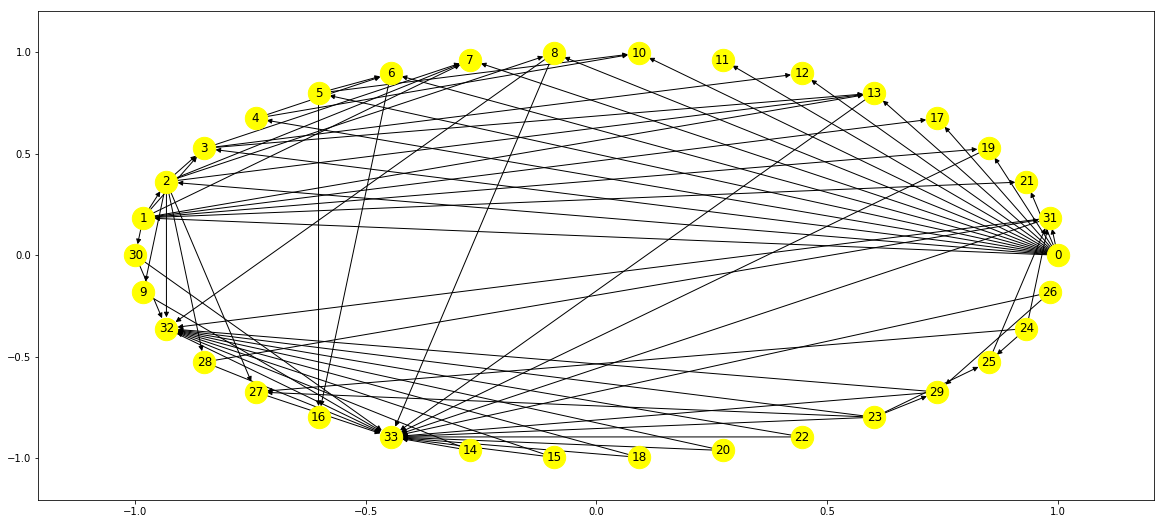

In [104]:
import networkx as nx

nx.draw_networkx(G,pos = nx.shell_layout(G),font_size=12, node_size= 500, node_color = 'yellow')
#plt.figure(figsize=(5,5))
plt.rcParams["figure.figsize"] = (10,10)
plt.show()
#original graph

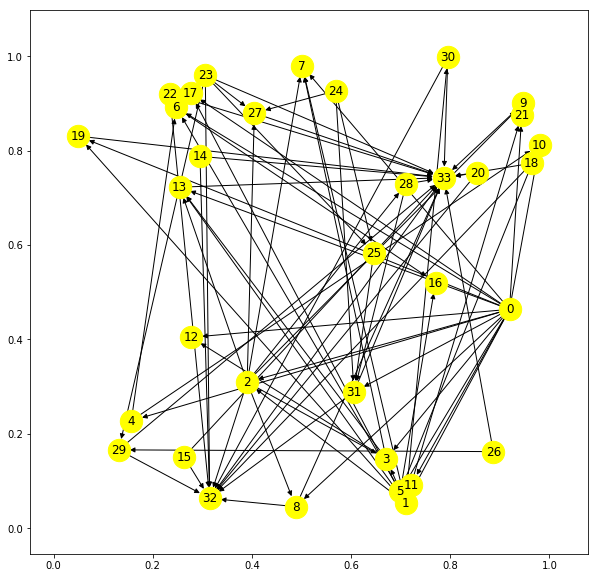

In [105]:
nx.draw_networkx(G,pos = nx.random_layout(G),font_size=12, node_size= 500, node_color = 'yellow')
#plt.figure(figsize=(5,5))
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

In [106]:
embedding = GraphFactorization(d=2, max_iter=100000, eta=1*10**-4, regu=1.0)
Y, t = embedding.learn_embedding(graph=G, edge_f=None, is_weighted=True, no_python=True)
print(embedding.get_embedding())

Could not import C++ module for Graph Factorization. Reverting to python implementation. Please recompile graphFac_ext from graphFac.cpp using bjam
		Iter id: 0, Objective: 77.0053, f1: 76.9994, f2: 0.00581578
		Iter id: 10000, Objective: 76.9969, f1: 76.9944, f2: 0.00247946
		Iter id: 20000, Objective: 76.995, f1: 76.9921, f2: 0.002918
		Iter id: 30000, Objective: 76.9943, f1: 76.9911, f2: 0.00316922
		Iter id: 40000, Objective: 76.994, f1: 76.9907, f2: 0.00327864
		Iter id: 50000, Objective: 76.9939, f1: 76.9906, f2: 0.00332263
		Iter id: 60000, Objective: 76.9939, f1: 76.9905, f2: 0.00333978
		Iter id: 70000, Objective: 76.9938, f1: 76.9905, f2: 0.00334639
		Iter id: 80000, Objective: 76.9938, f1: 76.9905, f2: 0.00334892
		Iter id: 90000, Objective: 76.9938, f1: 76.9905, f2: 0.00334989
[[-2.86324209e-06 -1.31995450e-03]
 [-5.67170743e-03 -3.97062480e-03]
 [-5.71139176e-03 -4.74042591e-03]
 [-5.45504590e-03  2.70579123e-03]
 [ 1.06660272e-02  3.30433220e-03]
 [ 1.10249235e-02  5.6302

# GraphFactorization embedding without edges

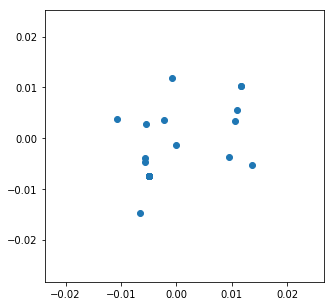

In [107]:
plt.rcParams["figure.figsize"] = (5,5)
viz.plot_embedding2D(embedding.get_embedding(), node_colors=None)


# GraphFactorization embedding with edges

C:\Users\Hp\Anaconda3\envs\tfp\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


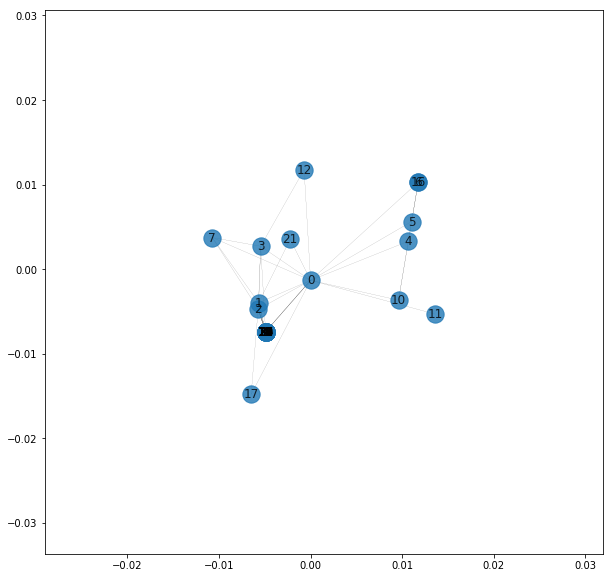

In [108]:
plt.rcParams["figure.figsize"] = (10,10)
# plot graph with edges
viz.plot_embedding2D(embedding.get_embedding(), di_graph=G, node_colors=None)

In [109]:
A = embedding.get_reconstructed_adj(embedding.get_embedding())
print(A)
# print reconstructed adjancency matrix

[[0.00000000e+00 5.25728357e-06 6.27349963e-06 ... 9.77722824e-06
  9.77761389e-06 9.77879189e-06]
 [5.25728357e-06 0.00000000e+00 5.12157958e-05 ... 5.72536071e-05
  5.72558656e-05 5.72614646e-05]
 [6.27349963e-06 5.12157958e-05 0.00000000e+00 ... 6.31426091e-05
  6.31451000e-05 6.31513998e-05]
 ...
 [9.77722824e-06 5.72536071e-05 6.31426091e-05 ... 0.00000000e+00
  7.88838228e-05 7.88922025e-05]
 [9.77761389e-06 5.72558656e-05 6.31451000e-05 ... 7.88838228e-05
  0.00000000e+00 7.88953145e-05]
 [9.77879189e-06 5.72614646e-05 6.31513998e-05 ... 7.88922025e-05
  7.88953145e-05 0.00000000e+00]]


In [110]:
print(A.shape)

(34, 34)


In [111]:
import numpy as np
import seaborn as sns
def create_adj_mtx(edge_f_path):
    with open(edge_f_path, 'r') as f:
        #read content
        content = f.readlines()
        #get rid off \n and split
        content = [x.strip().split() for x in content]
        #convert to int
        content_int = []
        for row in content:
            n_row = [int(e) for e in row]
            content_int.append(n_row)
            
        #print(content_int)
        max_node = max(max(x) for x in content_int)
        #print(max_node)
    #define adjancency matrix
    adj_mtx = np.zeros((max_node+1, max_node+1))
    for edge in content_int:
        adj_mtx[edge[0], edge[1]]=1
    #print(adj_mtx)
    return adj_mtx
    
original_adj = create_adj_mtx(edge_f)
def plot2heatmap(adj1, adj2):
    plt.rcParams["figure.figsize"] = (20,9)
    fig, (ax1, ax2) = plt.subplots(1,2)
    sns.heatmap(A, ax=ax1)
    sns.heatmap(original_adj, ax=ax2)
    plt.show()

# GraphFactorization embedding
# Heatmap of reconstructed adjacency matrix and original one

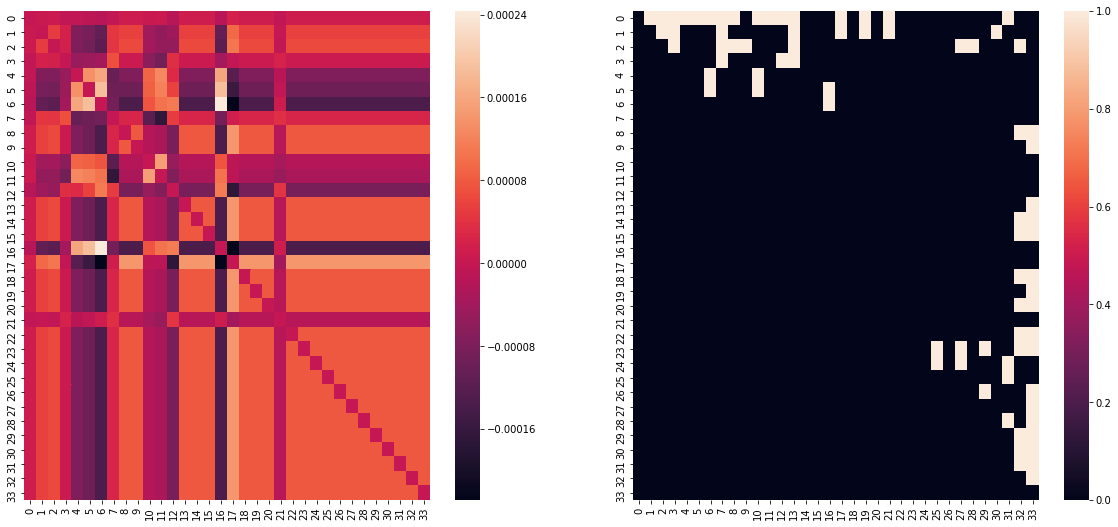

In [112]:
plot2heatmap(A, original_adj)



# HOPE embedding

SVD error (low rank): 0.053622
Embedding dimension greater than 2, use tSNE to reduce it to 2


C:\Users\Hp\Anaconda3\envs\tfp\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


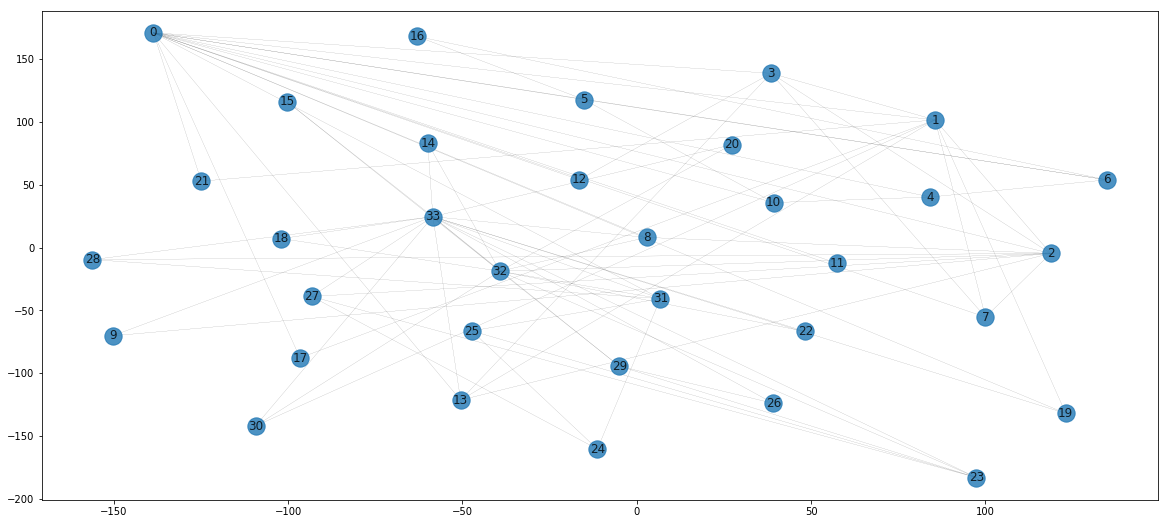

In [113]:
embedding = HOPE(d=4, beta=0.01)
Y, t = embedding.learn_embedding(graph=G, edge_f=None, is_weighted=True, no_python=True)
viz.plot_embedding2D(embedding.get_embedding(), di_graph=G, node_colors=None)

# HOPE embedding
# Heatmap of reconstructed adjacency matrix and original one

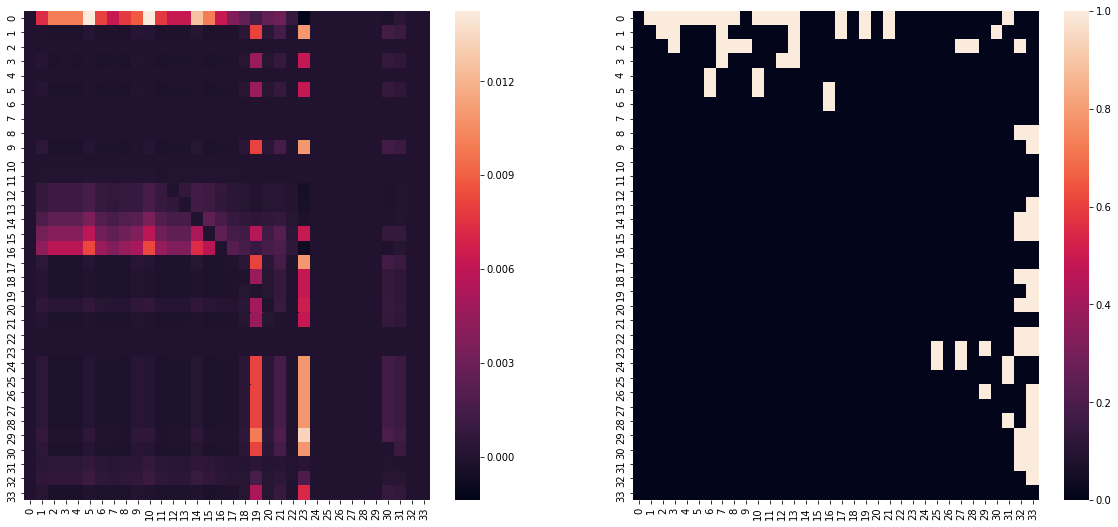

In [114]:
A = embedding.get_reconstructed_adj(embedding.get_embedding())
plot2heatmap(A, original_adj)

# LaplacianEigenmaps embedding

Laplacian matrix recon. error (low rank): 6.293280
	MAP: 0.42062781898849766 	 precision curve: [0.0, 0.0, 0.0, 0.25, 0.2]



----------------------------------------------------------------------------------------------------


C:\Users\Hp\Anaconda3\envs\tfp\lib\site-packages\numpy\core\numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
C:\Users\Hp\Anaconda3\envs\tfp\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Hp\Anaconda3\envs\tfp\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
C:\Users\Hp\Anaconda3\envs\tfp\lib\site-packages\matplotlib\text.py:853: ComplexWarning: Casting complex values to real discards the imaginary part
  x = float(self.convert_xunits(self._x))
C:\Users\Hp\Anaconda3\envs\tfp\lib\site-packages\matplotlib\text.py:854: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(self._y))
C:\Users\Hp\Anaconda3\envs\tfp\lib

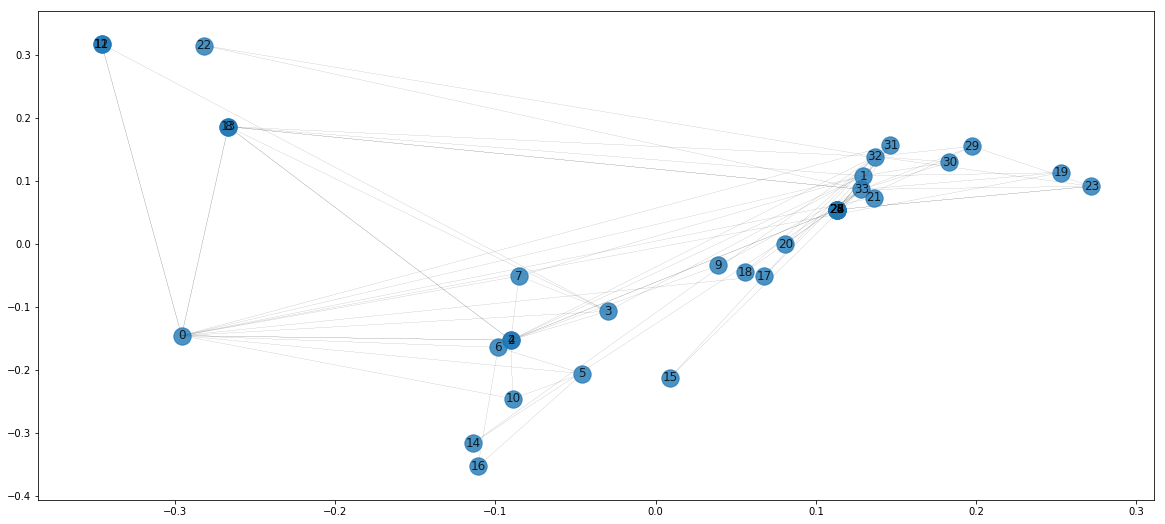

In [115]:
embedding = LaplacianEigenmaps(d=2)
Y, t = embedding.learn_embedding(graph=G, edge_f=None, is_weighted=True, no_python=True)
MAP, prec_curv, err, err_baseline = gr.evaluateStaticGraphReconstruction(G, embedding, Y, None)
print(("\tMAP: {} \t precision curve: {}\n\n\n\n"+'-'*100).format(MAP,prec_curv[:5]))
viz.plot_embedding2D(embedding.get_embedding(), di_graph=G, node_colors=None)

# LaplacianEigenmaps embedding


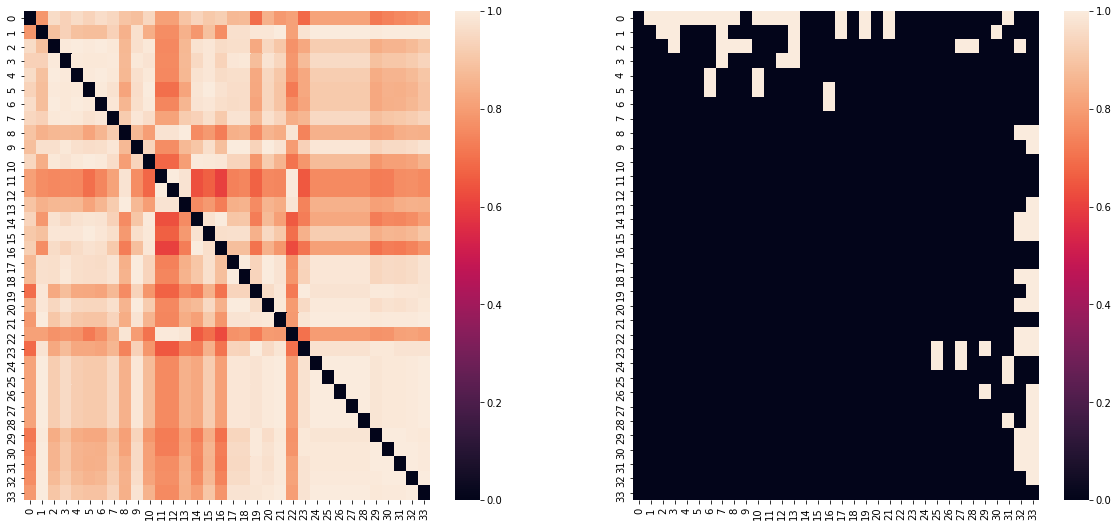

In [116]:
A = embedding.get_reconstructed_adj(embedding.get_embedding())
plot2heatmap(A, original_adj)

# LocallyLinearEmbedding embedding

C:\Users\Hp\Anaconda3\envs\tfp\lib\site-packages\scipy\sparse\linalg\eigen\arpack\arpack.py:1865: RuntimeWarning: invalid value encountered in sqrt
  s = np.sqrt(eigvals)
C:\Users\Hp\Anaconda3\envs\tfp\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


	MAP: 0.4529470762215162 	 precision curve: [0.0, 0.0, 0.0, 0.25, 0.2]



----------------------------------------------------------------------------------------------------


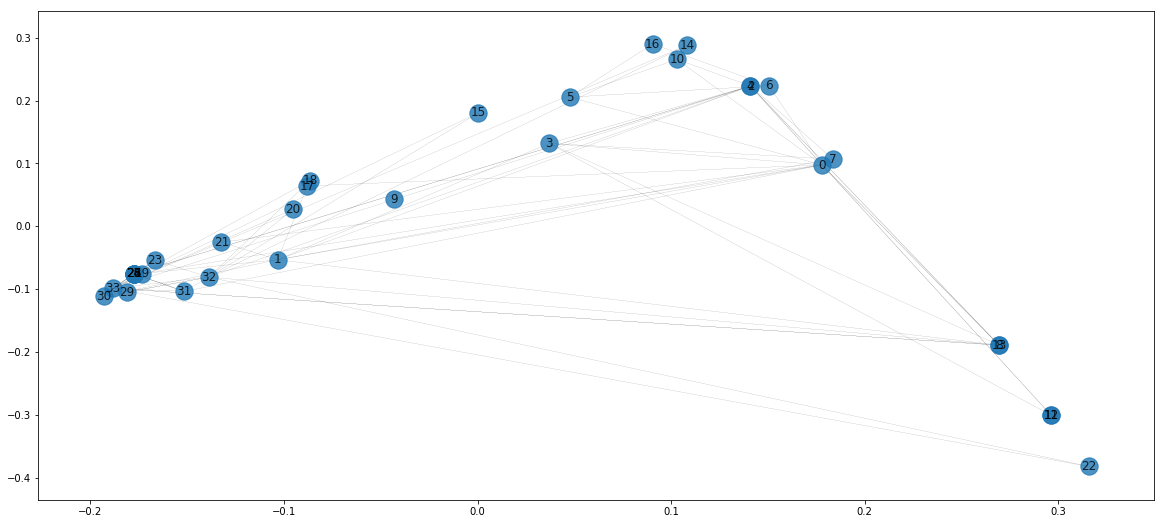

In [117]:
embedding = LocallyLinearEmbedding(d=2)
Y, t = embedding.learn_embedding(graph=G, edge_f=None, is_weighted=True, no_python=True)
MAP, prec_curv, err, err_baseline = gr.evaluateStaticGraphReconstruction(G, embedding, Y, None)
print(("\tMAP: {} \t precision curve: {}\n\n\n\n"+'-'*100).format(MAP,prec_curv[:5]))
viz.plot_embedding2D(embedding.get_embedding(), di_graph=G, node_colors=None)

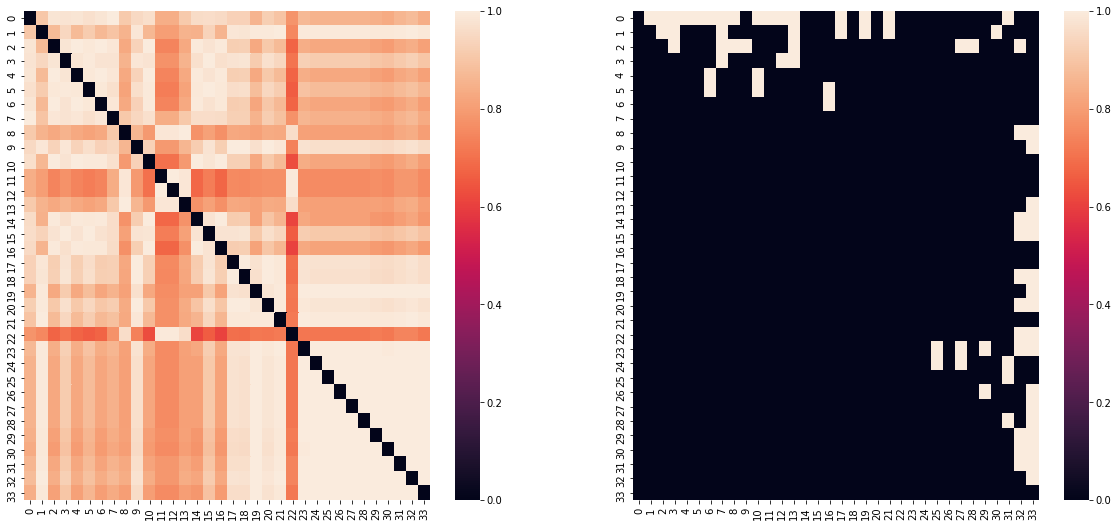

In [118]:
A = embedding.get_reconstructed_adj(embedding.get_embedding())
plot2heatmap(A, original_adj)